# 1-  Loading the libraries

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from scipy.stats import skew




#Model Building

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
 


  Created wheel for base: filename=base-1.0.4-py3-none-any.whl size=3280 sha256=5461bf407dddba475b2dbb2fde06b7b22b1b88f11f40332aa643ab8ac5415ebe
  Stored in directory: /home/paramathma/.cache/pip/wheels/4b/30/f2/5dd263481a1d9ec459d020ca9039a202c06e59a80b1d568095
Successfully built base
Note: you may need to restart the kernel to use updated packages.


# 2- Loading the dataset

In [ ]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

# 3- Looking into the training data

In [ ]:
print(train.keys())

In [ ]:
train.head()

In [ ]:
train.tail()

## The Target Variable

### The distribution of SalePrice, the Feature that we need to predict

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f,ax = plt.subplots(figsize=(8,7))

sns.distplot(train['SalePrice'], color ='b')
ax.set(ylabel = "Frequency")
ax.set(xlabel = "SalePrice")
ax.set(title = "SalePrice Distribution" )
    sns.despine(trim=True, left=True)
plt.show()

In [ ]:
sns.scatterplot

## Calcul the skewness and the kurtosis

In [7]:
# Skewness and Kurtosis

print("Skewness : %f" % train['SalePrice'].skew() )
print("Kurtosis : %f" % train['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


We notice that the variable target is right skewed, the best way to fix it is to perform a log transformation of the same data

- Skewness


Skewness is the degree of distortion from the symmetrical bell curve or the normal distribution.

. symmetrical distribution must have a skewness of 0.

. Skewness can be positive or negative.

. Positive Skewness when The mean and median will be greater than the mode.

. Negative Skewness The mean and median will be less than the mode.

- Kurtosis

. Kurtosis is the measure of outliers present in the distribution.

. There are three types of Kurtosis: Mesokurtic, Leptokurtic, and Platykurtic.

. Mesokurtic distribution indicates an excess kurtosis of zero. This means that the data has a normal distribution.

. Leptokurtic shows a positive excess kurtosis, so Leptokurtic distribution indicates heavy tails that's means the existance of large outliers .

. A Platykurtic distribution shows a negative excess kurtosis.****

The skewness value is 1, that means that the data are moderately skewed, and we high Kurtosis indicates that the data

has heavy tails or outliers, so we needc to investigate!

## Log Transformation

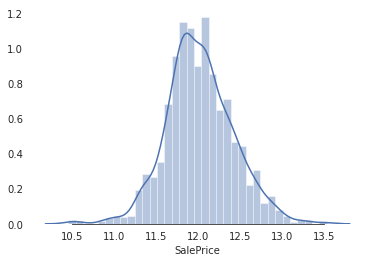

In [8]:
# In this case, We use the numpy fuction log1p which  applies log(1+x) to all elements of the column

train['SalePrice'] = np.log1p(train['SalePrice'])


# Check the Skewness

sns.distplot(train['SalePrice'], color = 'b')
ax.set(ylabel = "Frequency")
ax.set(xlabel = "SalePrice")
ax.set(title = "SalePrice Distribution")
sns.despine(trim=True, left=True)
plt.show()

So now the skewed seems corrected, and the data is normally distributed

# 4- Discover outliers with visualization tools

According to the article below, there are outliers for the GR LIVE AREA, and the outliers may affect our analysis. Tha author Dean De Cock  

[](http://)www.amstat.org/publications/jse/v19n3/decock.pdf

A. Box Plot

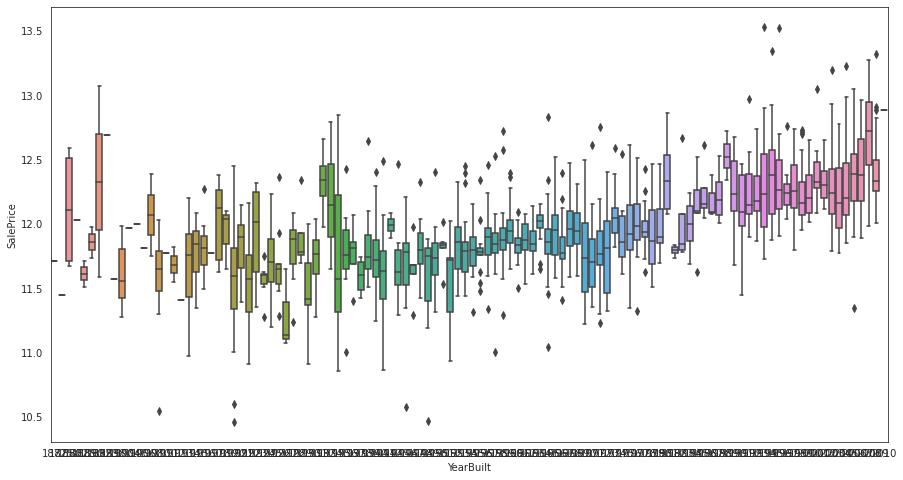

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(x= train.YearBuilt, y= train.SalePrice)

B. Scatter Plot

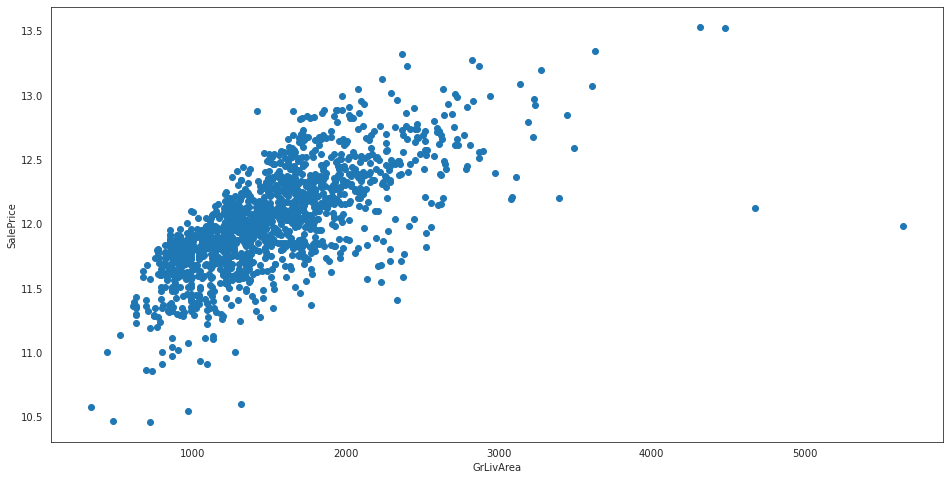

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(x = train.GrLivArea, y= train.SalePrice )
ax.set_xlabel('GrLivArea')
ax.set_ylabel('SalePrice')
plt.show()

As we see, there are some points which are far from the population like top right corner.

In [11]:
train.iloc[np.where(train.GrLivArea > 4000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.126764
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,13.534474
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,13.521141
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,11.982935


# 5- Deleting Outliers

NameError: name 'train' is not defined

In [12]:
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index,inplace=True)

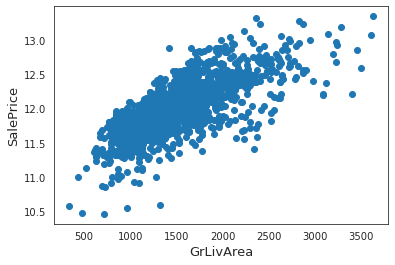

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = train.GrLivArea, y= train.SalePrice )
ax.set_xlabel('GrLivArea',fontsize=13)
ax.set_ylabel('SalePrice',fontsize =13)
plt.show()

# 6- Features Engineering

## Heatmap

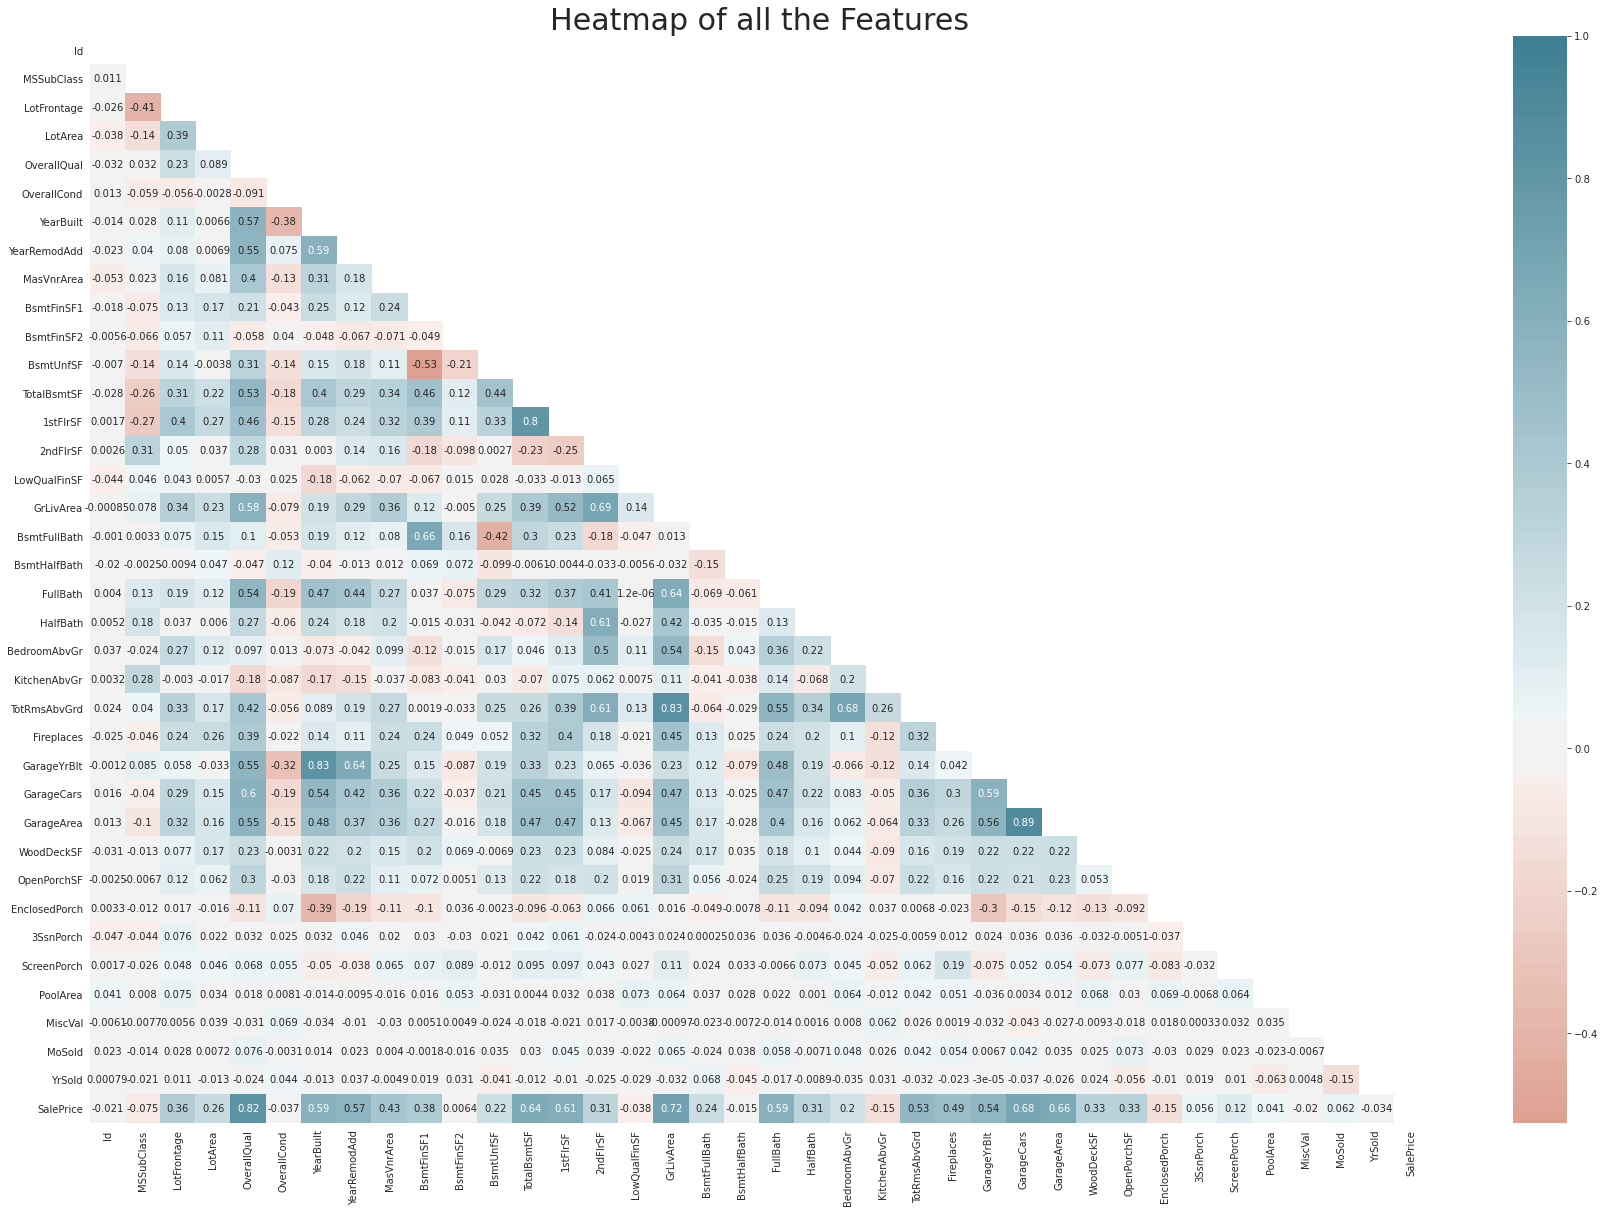

In [14]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

As we can see there is a correlation of:
    
- 83% between the TotRmsABVGr and GrLivArea
- 83% between YearBuilt and Gragae YrBlt
- 89% between GarageCars and GarageArea

## Numerical and Categorical Features

In [15]:
numerical_features = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = train.dtypes[train.dtypes == "object"].index
print("Number of categorical features:", len(categorical_features))

Number of Numerical features:  38
Number of categorical features: 43


## Dealing With Missing Values

In [16]:
# Check the percentage of missing values for each columns

total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['total', 'Missing_Ratio'])
missing_data.head(20)

,total,Missing_Ratio
PoolQC,1451,99.7
MiscFeature,1402,96.3
Alley,1365,93.8
Fence,1176,80.8
FireplaceQu,690,47.4
LotFrontage,259,17.8
GarageCond,81,5.6
GarageType,81,5.6
GarageYrBlt,81,5.6
GarageFinish,81,5.6


In [17]:
total = test.isnull().sum().sort_values(ascending=False)
percent_1 = test.isnull().sum()/test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['total', 'Missing_Ratio'])
missing_data.head(20)

,total,Missing_Ratio
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageQual,78,5.3
GarageYrBlt,78,5.3
GarageFinish,78,5.3


- LotFrontage

In [18]:
train['LotFrontage'] = train['LotFrontage'].fillna(train.LotFrontage.mean())

test['LotFrontage'] = test['LotFrontage'].fillna(test.LotFrontage.mean())

- Alley, PoolQC, iscFeature, Fence, GarageCond, GarageQual, GarageFinish, GarageType, FireplaceQu, BsmtExposure, BsmtCond, BsmtQual, BsmtFinType1, BsmtFinType2, MasVnrType

In [19]:
list1 =["Alley",
                       "PoolQC",
                      "MiscFeature",
                       "Fence",
                       "GarageCond",
                       "GarageQual",
                       "GarageFinish",
                       "GarageType",
                       "FireplaceQu",
                       "BsmtExposure",
                       "BsmtCond",
                       "BsmtQual",
                       "BsmtFinType1",
                       "BsmtFinType2",
                       "MasVnrType"]
                       
for i in list1:
    
    train[i] = train[i].fillna("None")
    test[i] = test[i].fillna("None")

- MasVnrArea, BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageYrBlt,GarageCars, GarageArea

In [20]:
list2 = ["MasVnrArea",
                          "BsmtFinSF1",
                          "BsmtFinSF2",
                           "BsmtUnfSF",
                          "TotalBsmtSF",
                          "BsmtFullBath",
                          "BsmtHalfBath",
                          "GarageYrBlt",
                          "GarageCars",
                          "GarageArea"]

for i in list2:
    train[i] = train[i].fillna(0)
    test[i] = test[i].fillna(0)

- Utilities, Electrical, Functional

In [21]:
train ["Utilities"]= train ["Utilities"].fillna("AllPub")
train ["Electrical"] = train ["Electrical"] .fillna("SBrkr")
train ["Functional"] = train ["Functional"] .fillna("Typ")

In [22]:
test ["Utilities"]=test ["Utilities"].fillna("AllPub")
test["Electrical"] = test["Electrical"] .fillna("SBrkr")
test ["Functional"] =test ["Functional"] .fillna("Typ")

- Exterior1st, Exterior2nd, KitchenQual, SaleType, MSZoning

In [23]:
train ["Exterior1st"]= train["Exterior1st"].fillna(train["Exterior1st"].mode()[0])
train ["Exterior2nd"]= train["Exterior2nd"].fillna(train["Exterior2nd"].mode()[0])
train["KitchenQual"] = train["KitchenQual"] .fillna(train["KitchenQual"].mode()[0])
train["SaleType"]  =   train["SaleType"] .fillna(train["SaleType"].mode()[0])

In [24]:
test ["Exterior1st"]= test["Exterior1st"].fillna(test["Exterior1st"].mode()[0])
test ["Exterior2nd"]= test["Exterior2nd"].fillna(test["Exterior2nd"].mode()[0])
test["KitchenQual"] = test["KitchenQual"] .fillna(test["KitchenQual"].mode()[0])
test["SaleType"]  =   test["SaleType"] .fillna(test["SaleType"].mode()[0])
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [25]:
# Some of the non-numeric predictors are stored as numbers; we convert them into strings 


#MSSubClass=The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)
test['OverallCond'] = test['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [26]:
train.shape, test.shape

((1456, 81), (1459, 80))

## Checking for missing values

In [27]:
train.isnull().any().any()

False

In [28]:
test.isnull().any().any()

False

## Label Encoding some categorical variables that may contain information in their ordering set

In [29]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(set(train[c].unique().tolist() + test[c].unique().tolist())))
    train[c] = lbl.transform(list(train[c].values))
    test[c] = lbl.transform(list(test[c].values))

## Adding Features

In [30]:
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

## Skewed Features

In [31]:
#Seperating Columns for Skew check
y_train = train.SalePrice
train.drop(['SalePrice','Id'],axis=1,inplace=True)
test_Ids = test['Id']
test.drop('Id',axis=1,inplace=True)

In [32]:
numeric_f = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features

skewed_f = train[numeric_f].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew in train data' :skewed_f})
skewness.head(10)

,Skew in train data
MiscVal,24.418175
PoolArea,17.504556
LotArea,12.574590
3SsnPorch,10.279262
LowQualFinSF,8.989291
LandSlope,4.801326
KitchenAbvGr,4.476748
BsmtFinSF2,4.244209
BsmtHalfBath,4.124712
ScreenPorch,4.111400


In [33]:
#Transforming train Data

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features in train data to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train[feat] = boxcox1p(train[feat], lam)

There are 59 skewed numerical features in train data to Box Cox transform


In [34]:
numeric_f = test.dtypes[test.dtypes != "object"].index

# Check the skew of all numerical features

skewed_f = test[numeric_f].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew in test data' :skewed_f})
skewness.head(10)

,Skew in test data
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
3SsnPorch,12.511336
LandSlope,4.963280
EnclosedPorch,4.664371
KitchenAbvGr,4.074860
BsmtFinSF2,4.038796
ScreenPorch,3.784349
BsmtHalfBath,3.779085


In [35]:
    #Transforming test Data

    skewness = skewness[abs(skewness) > 0.75]
    print("There are {} skewed numerical features in test data to Box Cox transform".format(skewness.shape[0]))

    from scipy.special import boxcox1p
    skewed_features = skewness.index
    lam = 0.15
    for feat in skewed_features:
        test[feat] = boxcox1p(test[feat], lam)

There are 59 skewed numerical features in test data to Box Cox transform


## Getting Dummy Variables

In [36]:

train = pd.get_dummies(train)
test = pd.get_dummies(test)

#Balancing Data Sets
missing_cols = set(train.columns) - set(test.columns)
for c in missing_cols:
    test[c] = 0  

missing_cols = set(test.columns) - set(train.columns)
for c in missing_cols:
    train[c] = 0
    
test = test[train.columns.tolist()]

#Checking Shapes
train.shape,test.shape

((1456, 222), (1459, 222))

# 7- Modeling

In [37]:


n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## Base models

In [38]:
#Lasso

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [39]:
#ElasticNet

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


In [40]:
#KernelRidge

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


In [41]:
#Gradient Boosting Regressor

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [42]:
# XGB Regressor

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, verbosity=0,
                             random_state =7, nthread = -1)

In [43]:
#light gbm 

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

## Base models scores

In [44]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1112 (0.0074)



In [45]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1112 (0.0074)



In [46]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1151 (0.0076)



In [47]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1173 (0.0088)



In [48]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1142 (0.0043)



In [49]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1164 (0.0050)



## Stacking models

### Average Based Model Class


In [50]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

### Averaging Class Score


In [51]:
averaged_score = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_score)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1087 (0.0076)



## Adding a Meta Class


In [52]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y.iloc[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

## Scoring

In [53]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1081 (0.0071)


## Final Prediction


In [54]:
#rmsle 
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### Stacked Regressor

In [55]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07925870671732348


### XGBoost

In [56]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07950558887580232


### LightGBM

In [57]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07229139082633394


### Final Train Score

In [58]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07627675012629717


### Test Prediction

In [61]:
Predictions = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

### Submission

In [62]:
subm = pd.DataFrame()
subm['Id'] = test_Ids
subm['SalePrice'] = Predictions
subm.to_csv('submission.csv',index=False)